In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from sklearn.preprocessing import LabelEncoder
import sklearn as sk
dataset=pd.read_csv(r"TaxiFare.csv")
dataset

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [3]:
dataset.isnull()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
49995,False,False,False,False,False,False,False,False
49996,False,False,False,False,False,False,False,False
49997,False,False,False,False,False,False,False,False
49998,False,False,False,False,False,False,False,False


In [16]:
dataset.fillna(0,inplace=False)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [19]:
lab=LabelEncoder()

In [30]:
dataset['date_time_of_pickup']=lab.fit_transform(dataset['date_time_of_pickup'])
dataset['unique_id']=lab.fit_transform(dataset['unique_id'])


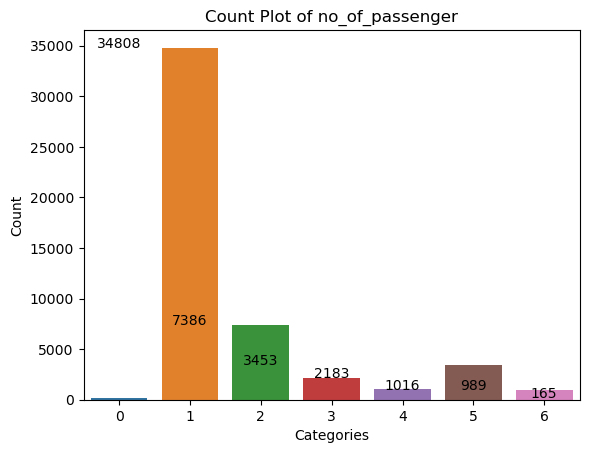

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
plot=sns.countplot(data=dataset,x="no_of_passenger")
value_counts=dataset["no_of_passenger"].value_counts()
for i,count in enumerate(value_counts):
    plot.text(x=i,y=count+i,s=str(count),ha="center")
plot.set_xlabel("Categories")
plot.set_ylabel("Count")
plot.set_title("Count Plot of no_of_passenger")
plt.show()

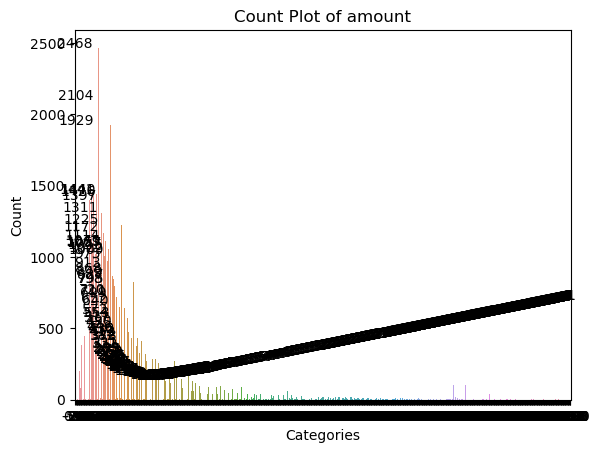

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
plot=sns.countplot(data=dataset,x="amount")
value_counts=dataset["amount"].value_counts()
for i,count in enumerate(value_counts):
    plot.text(x=i,y=count+i,s=str(count),ha="center")
plot.set_xlabel("Categories")
plot.set_ylabel("Count")
plot.set_title("Count Plot of amount")
plt.show()

In [46]:
x=dataset.iloc[:,0:8].values
x

array([[ 1.5790000e+03,  4.5000000e+00,  3.4080000e+03, ...,
        -7.3841610e+01,  4.0712278e+01,  1.0000000e+00],
       [ 3.1330000e+03,  1.6900000e+01,  7.7480000e+03, ...,
        -7.3979268e+01,  4.0782004e+01,  1.0000000e+00],
       [ 2.0970000e+03,  5.7000000e+00,  2.0152000e+04, ...,
        -7.3991242e+01,  4.0750562e+01,  2.0000000e+00],
       ...,
       [ 3.1770000e+03,  6.9000000e+00,  1.5821000e+04, ...,
        -7.3998108e+01,  4.0759483e+01,  1.0000000e+00],
       [ 5.4000000e+02,  4.5000000e+00,  2.9672000e+04, ...,
        -7.3953450e+01,  4.0779687e+01,  2.0000000e+00],
       [ 7.9400000e+02,  1.0900000e+01,  7.9270000e+03, ...,
        -7.3932603e+01,  4.0763805e+01,  1.0000000e+00]])

In [47]:
y=dataset.iloc[:,7].values 
y

array([1, 1, 2, ..., 1, 2, 1], dtype=int64)

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("x shape is",x.shape)
print("y shape is",y.shape)
print("x_test shape is",x_test.shape)
print("x_train shape is",x_train.shape)
print("y_train shape is",y_train.shape)
print("y_test shape is",y_test.shape)


x shape is (50000, 8)
y shape is (50000,)
x_test shape is (10000, 8)
x_train shape is (40000, 8)
y_train shape is (40000,)
y_test shape is (10000,)


In [53]:
from sklearn.linear_model import LinearRegression
import seaborn as sns
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred = lin_reg.predict(x_test)
y_pred=np.round(y_pred)
print("predicted y_test values are",y_pred)


predicted y_test values are [1. 2. 1. ... 1. 1. 3.]
